1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [6]:
## cuando utilizas con k3 y con k7 que te salen las predicciones con cada uno de esos ejemplos.
## Copiar la funcion de rango y hacer entre 1 y 20.
#Luego copiar al 60% la muestra

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [17]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le_variety = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y = le_variety.fit_transform(df.variety)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
import numpy as np
sepal_length = np.array(df["sepal.length"])
sepal_width = np.array(df["sepal.width"])
petal_length = np.array(df["petal.length"])
petal_width = np.array(df["petal.width"])

y = np.array(y)


In [19]:
X = np.array(list(zip(sepal_length,sepal_width, petal_length, petal_width )))

In [20]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


#### Generating Model

### k=3 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 1, 1, 0, 1, 1])

In [22]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


## Nuevos individuos

In [23]:
#Predict Output
predicted_1 = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted_1)

[2]


In [24]:
predicted_2 = model.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted_2)

[2]


In [88]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 1, 2, 1, 0, 1, 0, 2])

In [89]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [90]:
# Porcentaje
model.score(X_train, y_train)

0.9583333333333334

### k=7

In [91]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [92]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [93]:

knn.score(X_train, y_train)

0.975

#### Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica

([<matplotlib.axis.XTick at 0x1fb12f50cc8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

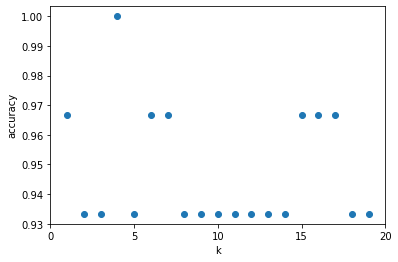

In [94]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [95]:
scores

{1: 0.9666666666666667,
 2: 0.9333333333333333,
 3: 0.9333333333333333,
 4: 1.0,
 5: 0.9333333333333333,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9333333333333333,
 9: 0.9333333333333333,
 10: 0.9333333333333333,
 11: 0.9333333333333333,
 12: 0.9333333333333333,
 13: 0.9333333333333333,
 14: 0.9333333333333333,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9333333333333333,
 19: 0.9333333333333333}

### Respuesta
#### Para un rango del 1 al 20, el k que tiene un mejor acierto en este modelo son el k9, k10, k11 y k12 


### Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [96]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


### k3

In [97]:


from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 



KNeighborsClassifier(n_neighbors=3)

In [98]:
#Predict Output
predicted_1 = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

[2]


In [99]:
predicted_2 = model.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted)

[2]


In [100]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2,
       1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2,
       0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2])

In [101]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [102]:
# Porcentaje
model.score(X_train, y_train)

0.9666666666666667

### k=7

In [103]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [104]:
#Predict Output
predicted_1 = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

[2]


In [105]:
predicted_2 = model.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted)

[2]


In [106]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2,
       1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2,
       0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2,
       2, 2])

In [107]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [108]:
# Porcentaje
model.score(X_train, y_train)

0.9666666666666667

### RESPUESTA
#### Cuando se utiliza un porcentaje mayor como parte del test se observa que no hay una disminucion en el valor del score y del accuracy, es decir que para esta base de datos, a pesar de tener un porcentaje menor de datos para entrenar, con ese porcetaje, el modelo ha aprendido y ha podido devolver un buen resultado para este modelo. 

### Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [110]:
df2 = df.drop(df[df['variety'] == "Setosa"].index)
df2



,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [111]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le_variety = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y = le.fit_transform(df2.variety)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [112]:
import numpy as np
sepal_length = np.array(df2["sepal.length"])
sepal_width = np.array(df2["sepal.width"])
petal_length = np.array(df2["petal.length"])
petal_width = np.array(df2["petal.width"])

y = np.array(y)

In [113]:
X = np.array(list(zip(sepal_length,sepal_width, petal_length, petal_width )))

In [114]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(80, 4)
(20, 4)


### Generating Model

### k=3

In [115]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [116]:
#Predict Output
predicted_1 = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

[2]


In [117]:
predicted_2 = model.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted)

[2]


In [118]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [119]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [120]:
# Porcentaje
model.score(X_train, y_train)

0.95

In [121]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [122]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [123]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [124]:
# Porcentaje
model.score(X_train, y_train)

0.9625

### Respuesta 
#### Eliminando la clase "setosa", los resultados del modelo mejoran con relacion a la utilizacion de tres clases. Esto se da por que tienen menos clases por entrenar.

### PREGUNTA: ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

#### El algoritmo Knn es un buen algoritmo para estos datos, ya que este no aprende patrones entre datos, aprende características de los datos de entrenamiento como es el caso de esta base de datos que muestra clases de flores. Ademas la columna target esta presentada en clases, y este es de clasificación no paramétrico.
